# required package

In [ ]:
library(ggplot2)
library(dplyr)

# data created

In [2]:
treatment=rep(c("Cultivar A", "Cultivar B", "Cultivar C", "Cultivar D", "Cultivar E"), each=3)
rep=rep(c("I", "II", "III"), time=5)
yield=c(10, 11, 21, 13, 23, 23, 13, 13, 5, 33, 21, 13, 42, 12, 13)
dataA=data.frame(treatment, rep, yield)

summary=dataA %>%
        group_by(treatment) %>%
        summarize(across(c(yield),
                   .fns= list(
                    Mean= ~mean(., na.rm=TRUE),
                    SD= ~sd(., na.rm=TRUE),
                    n= ~length(.),
                    se= ~sd(., na.rm=TRUE) / sqrt(length(.))
                   ))) %>%
ungroup()

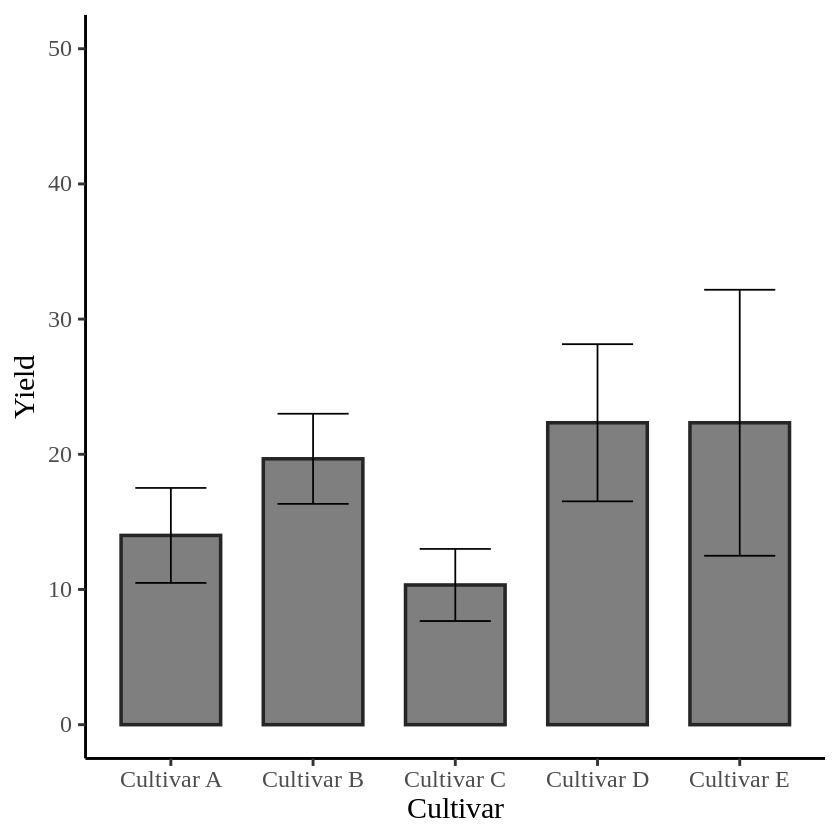

In [4]:
ggplot(data= summary, aes(x=treatment, y=yield_Mean)) +
  geom_bar(stat="identity", position="dodge", width=0.7, size=1,
           fill="grey50", color="grey15") +
  geom_errorbar(aes(ymin= yield_Mean-yield_se, ymax=yield_Mean+yield_se),
                position=position_dodge(0.9), width=0.5) +
  scale_y_continuous(breaks=seq(0, 50, 10), limits=c(0, 50)) +
  labs(x="Cultivar", y="Yield") +
  theme_classic(base_size=18, base_family="serif")

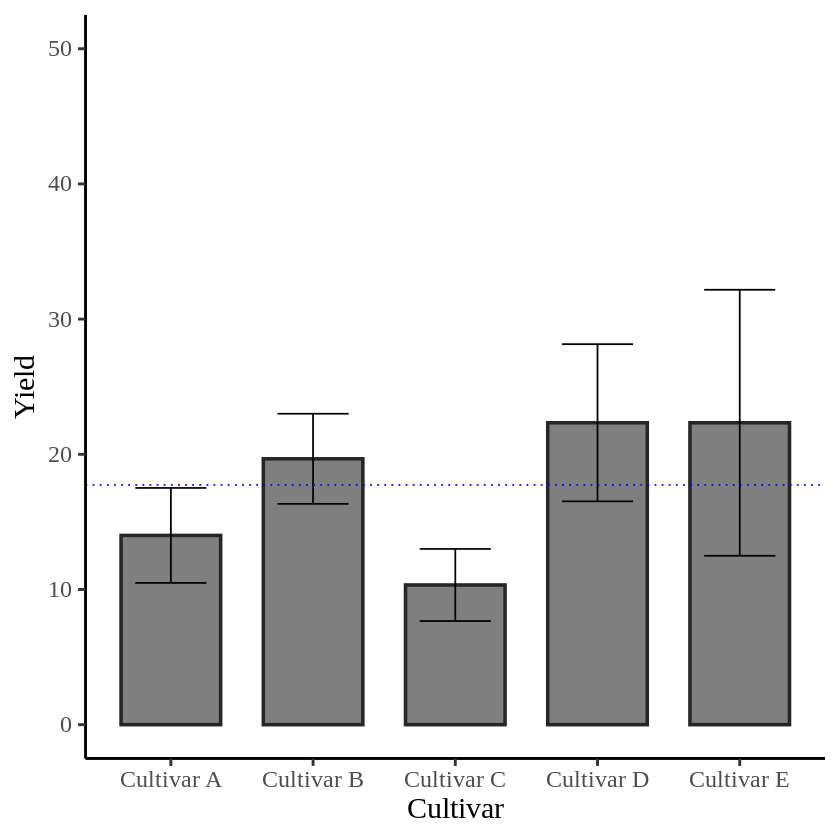

In [5]:
ggplot(data=summary, aes(x=treatment, y=yield_Mean)) +
  geom_bar(stat="identity", position="dodge", width=0.7, size=1,
           fill="grey50", color="grey15") +
  geom_errorbar(aes(ymin=yield_Mean-yield_se, ymax=yield_Mean+yield_se),
                position=position_dodge(0.9), width=0.5) +
  geom_hline(yintercept=mean(summary$yield_Mean), linetype="dotted", color="blue") +
  scale_y_continuous(breaks=seq(0, 50, 10), limits=c(0, 50)) +
  labs(x="Cultivar", y="Yield") +
  theme_classic(base_size=18, base_family="serif")

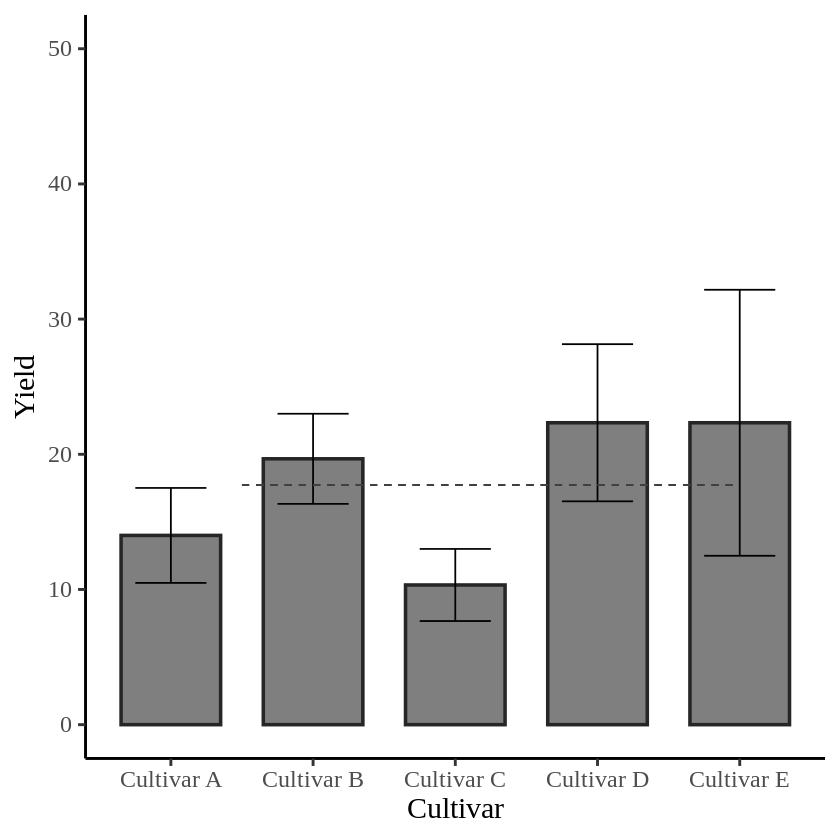

In [6]:
ggplot(data=summary, aes(x=treatment, y=yield_Mean)) +
  geom_bar(stat="identity", position="dodge", width=0.7, size=1,
           fill="grey50", color="grey15") +
  geom_errorbar(aes(ymin=yield_Mean-yield_se, ymax=yield_Mean+yield_se),
                position=position_dodge(0.9), width=0.5) +

  geom_segment(aes(x=1.5,
                   y=mean(na.rm=TRUE, mean(yield_Mean)),
                   xend=max(as.numeric(factor(treatment))),
                   yend=mean(na.rm=TRUE, mean(yield_Mean))),
                   linetype="dashed", color="grey25", size=0.5) +

  scale_y_continuous(breaks=seq(0, 50, 10), limits=c(0, 50)) +
  labs(x="Cultivar", y="Yield") +
  theme_classic(base_size=18, base_family="serif")